### Libreries

In [1]:
# Librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Payoffs

In [2]:

# Payoff de estrategias combinando calls y puts
# Si el precio P es un array, devuelve un array
def put(P, strike, premium):
    return max(strike-P, 0)-premium
def call(P, strike, premium):
    return max(P-strike, 0)-premium
def future(P, strike):
    return P-strike

def put_delta(P, strike, premium, delta):
    return max(strike-P**delta, 0)-premium
def call_delta(P, strike, premium, delta):
    return max(P**delta-strike, 0)-premium

### Test

In [3]:
def plot_strategy(parameters):
    asset_size, future_strike, future_leverage, future_size, put_strike, put_premium, put_size, call_strike, call_premium, call_size=parameters
    fig = plt.figure(figsize = (20,7))
    axs = fig.subplots(1)

    asset = [position_Asset*asset_size*(i-1)*P_entry for i in grid] 
    call = [position_Call*call_size*long_call(i*P_entry, call_strike, call_premium) for i in grid]
    put = [position_Put*put_size*long_put(i*P_entry, put_strike, put_premium) for i in grid]
    future = [position_Future*future_size*future_leverage*long_future(i*P_entry, future_strike) for i in grid]
    pnl = [i+j+k+l for i,j,k,l in zip(asset, future, call, put)]

    axs.plot(grid*P_entry, call, c='green', linestyle = 'dashed', label='Call')
    axs.plot(grid*P_entry, put, c='red', linestyle = 'dashed', label='Put')
    axs.plot(grid*P_entry, future, c='orange',linestyle = 'dashed',  label='Future')
    axs.plot(grid*P_entry, pnl, c='blue', label='PnL')

    #axs.set_title('Profit and Loss', fontdict=font)
    #plt.text(0,0, f'Fee = 0', fontdict=font)

    # axs.set_xlabel(f'Precio final de {pool_symbols[0]} expresado en {pool_symbols[1]}', fontdict=font)
    # axs.set_ylabel(f'PnL (valuado en {pool_symbols[1]})', fontdict=font)
    axs.plot(P_entry, 0, 'bo', label='Initial Price')
    axs.plot(call_strike, 0, 'go', label='Strike Call')
    axs.plot(put_strike, 0, 'ro', label='Strike Put')
    axs.plot(future_strike, 0, 'ro', label='Strike Future')
    axs.axhline(0, c='black')#,linestyle='dashed')
    # axs.set_ylim(-50,500)
    # axs.set_xlim(800,1500)
    axs.legend()

In [5]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
def plot_strategy_multiple(parameters):
    asset_size, future_pos, future_strike, future_leverage, future_size, put_pos, put_strike, put_premium, put_size, call_pos, call_strike, call_premium, call_size=parameters
    asset = [position_Asset*asset_size*(i-1)*P_entry for i in grid] 
    future = [0]*len(grid)
    if len(future_pos) != 0:
        for j in range(len(grid)):
            for i in range(len(future_pos)):
                future[j] += future_pos[i]*future_size[i]*future_leverage[i]*long_future(grid[j]*P_entry, future_strike[i])

    call = [0]*len(grid)
    if len(call_pos) != 0:
        for j in range(len(grid)):
            for i in range(len(call_pos)):
                call[j] = call_pos[i]*call_size[i]*long_call(grid[j]*P_entry, call_strike[i], call_premium[i])

    put = [0]*len(grid)
    if len(put_pos) != 0:
        for j in range(len(grid)):
            for i in range(len(put_pos)):
                put[j] += put_pos[i]*put_size[i]*long_put(grid[j]*P_entry, put_strike[i], put_premium[i])

    pnl = [i+j+k+l for i,j,k,l in zip(asset, future, call, put)]
    
    fig = plt.figure(figsize = (20,7))
    axs = fig.subplots(1)
    axs.plot(grid*P_entry, call, c='green', linestyle = 'dashed', label='Call')
    axs.plot(grid*P_entry, put, c='red', linestyle = 'dashed', label='Put')
    axs.plot(grid*P_entry, future, c='orange',linestyle = 'dashed',  label='Future')
    axs.plot(grid*P_entry, pnl, c='blue', label='PnL')

    #axs.set_title('Profit and Loss', fontdict=font)
    #plt.text(0,0, f'Fee = 0', fontdict=font)

    # axs.set_xlabel(f'Precio final de {pool_symbols[0]} expresado en {pool_symbols[1]}', fontdict=font)
    # axs.set_ylabel(f'PnL (valuado en {pool_symbols[1]})', fontdict=font)
    axs.plot(P_entry, 0, 'bo', label='Initial Price')
    
    if len(call_strike) != 0:
        for strike in call_strike:
            axs.plot(strike, 0, 'go', label='Strike Call')
    if len(put_strike) != 0:
        for strike in put_strike:
            axs.plot(strike, 0, 'ro', label='Strike Put')
    if len(future_strike) != 0:
        for strike in future_strike:
            axs.plot(strike, 0, 'ro', label='Strike Future')
    axs.axhline(0, c='black')#,linestyle='dashed')
    # axs.set_ylim(-50,500)
    # axs.set_xlim(800,1500)
    axs.legend()

### User Calc (only 1 derivative)

In [6]:
## Initialize parameters
asset_size, future_strike, future_leverage, future_size, put_strike, put_premium, put_size, call_strike, call_premium, call_size =  0,0,0,0,0,0,0,0,0,0
P_entry=float(input("Enter Current Price"))
instruments = ["Asset", "Future", "Put", "Call"]
for instrument in instruments:
    globals()["position_"+instrument] = 1

# User Inputs    
while True:
    # Choose instrument
    instrument = input("Which instruments would you like to add (enter number): \n 1. Asset \n 2. Future \n 3. Put \n 4. Call \n 5. None \n")
    
    # Choose position: Long / Short
    position = input("Position \n 1. Long \n 2. Short \n")
    if position == "1":
        globals()["position_"+instrument] = 1
    else:
        globals()["position_"+instrument] = -1

    # Choose features of each asset (strike, leverage, size, premium)    
    if instrument == "1":
        asset_size = int(input("Asset size? \n"))
    elif instrument == "2":
        future_strike=float(input("Future Strike? \n"))
        future_leverage = int(input("Future Leverage? \n"))
        future_size = int(input("Future Size? \n"))
    elif instrument == "3":
        put_strike=float(input("Put Strike? \n"))
        put_premium=float(input("Put Premium? \n"))
        put_size=int(input("Put Size? \n"))
    elif instrument == "4":
        call_strike=float(input("Call Strike? \n"))
        call_premium=float(input("Call Premium? \n"))
        call_size=int(input("Call Size? \n"))
    elif instrument == "5":
        break
    else:
        print("Please enter a valid integer for instruments \n")
        continue
    
    # Add more assets
    extra_asset = input("Would you like to add more assets? \n 1. Yes \n 2. No \n")
    if extra_asset == "1":
        continue
    
    # Remove asset
    while True:
        remove_asset = input("Would you like to remove any asset? \n 1. Asset \n 2. Future \n 3. Put \n 4. Call \n 5. None \n")

        if remove_asset == "1":
            asset_size = 0
            continue
        elif remove_asset == "2":
            future_size = 0
            continue
        elif remove_asset == "3":
            put_size = 0
            continue
        elif remove_asset == "4":
            call_size = 0
            continue
        else:
            break
        
    # Plot strategy
#     else:
    parameters = [asset_size, future_strike, future_leverage, future_size, put_strike, put_premium, put_size, call_strike, call_premium, call_size]
    plot_strategy(parameters)
    plt.show()
    break
    

KeyboardInterrupt: Interrupted by user

### User Calc (multiple strikes)

In [6]:
import matplotlib
matplotlib.use('nbagg')

Enter Current Price1210.1
Which instruments would you like to add (enter number): 
 1. Asset 
 2. Future 
 3. Put 
 4. Call 
 5. None 
3
Position 
 1. Long 
 2. Short 
1
Put Strike? 
1200
Put Premium? 
96.7
Put Size? 
1
Would you like to add more assets? 
 1. Yes 
 2. No 
1
Which instruments would you like to add (enter number): 
 1. Asset 
 2. Future 
 3. Put 
 4. Call 
 5. None 
4
Position 
 1. Long 
 2. Short 
1
Call Strike? 
1100
Call Premium? 
167.6
Call Size? 
2
Would you like to add more assets? 
 1. Yes 
 2. No 
1
Which instruments would you like to add (enter number): 
 1. Asset 
 2. Future 
 3. Put 
 4. Call 
 5. None 
4
Position 
 1. Long 
 2. Short 
2
Call Strike? 
1200
Call Premium? 
104.06
Call Size? 
1
Would you like to add more assets? 
 1. Yes 
 2. No 
2


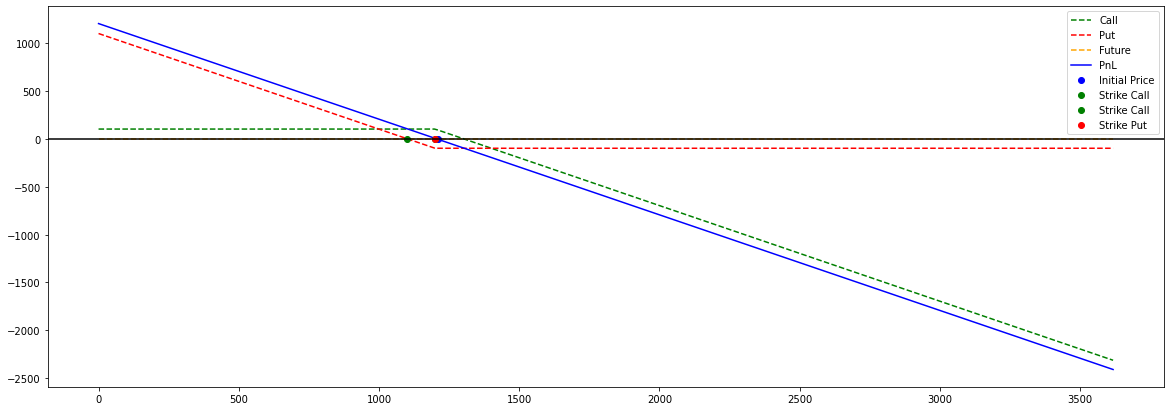

In [6]:
## Initialize parameters
asset_size, future_strike, future_leverage, future_size, put_strike, put_premium, put_size, call_strike, call_premium, call_size =  0,[],[],[],[],[],[],[],[],[]
P_entry=float(input("Enter Current Price"))
instruments = ["Asset", "Future", "Put", "Call"]
for instrument in instruments:
    globals()["position_"+instrument] = 1
future_pos, put_pos, call_pos = [], [], []
# User Inputs    
while True:
    # Choose instrument
    instrument = input("Which instruments would you like to add (enter number): \n 1. Asset \n 2. Future \n 3. Put \n 4. Call \n 5. None \n")
    
    # Choose position: Long / Short
#     position = input("Position \n 1. Long \n 2. Short \n")
#     if position == "1":
#         globals()["position_"+instrument] = 1
#     else:
#         globals()["position_"+instrument] = -1

    # Choose features of each asset (strike, leverage, size, premium)    
    if instrument == "1":
        position = input("Position \n 1. Long \n 2. Short \n")
        if position == "1":
            position_Asset = 1
        else:
            position_Asset = -1
        asset_size = int(input("Asset size? \n"))
    elif instrument == "2":
        position = input("Position \n 1. Long \n 2. Short \n")
        if position == "1":
            future_pos.append(1)
        else:
            future_pos.append(-1)
        future_strike.append(float(input("Future Strike? \n")))
        future_leverage.append(int(input("Future Leverage? \n")))
        future_size.append(int(input("Future Size? \n")))
    elif instrument == "3":
        position = input("Position \n 1. Long \n 2. Short \n")
        if position == "1":
            put_pos.append(1)
        else:
            put_pos.append(-1)
        put_strike.append(float(input("Put Strike? \n")))
        put_premium.append(float(input("Put Premium? \n")))
        put_size.append(int(input("Put Size? \n")))
    elif instrument == "4":
        position = input("Position \n 1. Long \n 2. Short \n")
        if position == "1":
            call_pos.append(1)
        else:
            call_pos.append(-1)
        call_strike.append(float(input("Call Strike? \n")))
        call_premium.append(float(input("Call Premium? \n")))
        call_size.append(int(input("Call Size? \n")))
    elif instrument == "5":
        continue
    else:
        print("Please enter a valid integer for instruments \n")
        continue
    
    # Add more assets
    extra_asset = input("Would you like to add more assets? \n 1. Yes \n 2. No \n")
    if extra_asset == "1":
        continue
    
#     # Remove asset
#     while True:
#         remove_asset = input("Would you like to remove any asset? \n 1. Asset \n 2. Future \n 3. Put \n 4. Call \n 5. None \n")

#         if remove_asset == "1":
#             asset_size = 0
#             continue
#         elif remove_asset == "2":
#             future_size = 0
#             continue
#         elif remove_asset == "3":
#             put_size = 0
#             continue
#         elif remove_asset == "4":
#             call_size = 0
#             continue
#         else:
#             break
        
    # Plot strategy
#     else:
    
    parameters = [asset_size, 
                  future_pos, future_strike, future_leverage, future_size, 
                  put_pos, put_strike, put_premium, put_size, 
                  call_pos, call_strike, call_premium, call_size]
    plot_strategy_multiple(parameters)
    plt.show()
    break
    

In [5]:
import opstrat as op
P_entry = 1218
K_call_long = 1075
K_call_short = 1300
K_put_long = 1200

premium_call_long = 167.6
premium_call_short = -104.06
premium_put_long = 96.7

bsm_long_call=op.black_scholes(K=K_call_long, St=P_entry, r=4, t=36, 
                     v=65, type='c')
bsm_short_call=op.black_scholes(K=K_call_short, St=P_entry, r=4, t=32, 
                     v=57.3, type='c')
bsm_long_put=op.black_scholes(K=K_put_long, St=P_entry, r=4, t=2, 
                     v=40, type='p')

In [7]:
op.black_scholes(K=11000, St=19500, r=4, t=180, 
                     v=130, type='c')

{'value': {'option value': 10661.729442983167,
  'intrinsic value': 8500,
  'time value': 2161.7294429831672},
 'greeks': {'delta': 0.8654628949862491,
  'gamma': 1.2167615985703692e-05,
  'theta': -11.392284334948995,
  'vega': 29.661814218737973,
  'rho': 30.648314018212723}}

In [4]:
eth_data = pd.read_csv('~/Git-Repos/HedgingScripts/files/ETHUSDC-1d-data_since_1 Jan 2019.csv')
btc_data = pd.read_csv('~/Git-Repos/HedgingScripts/files/BTCUSDC-1d-data_since_1 Jan 2019.csv')

In [98]:
eth_data['close'].pct_change().std()

0.053383091031499165

In [101]:
np.log(eth_data['close']/eth_data['close'].shift(1)).std()

0.0535564016519993

In [97]:
bsm_short_call

{'value': {'option value': 51.76718783814658,
  'intrinsic value': 0,
  'time value': 51.76718783814658},
 'greeks': {'delta': 0.39030517266208187,
  'gamma': 0.0018570957613890007,
  'theta': -1.2855500035277523,
  'vega': 1.3840144077314671,
  'rho': 0.37139683284538655}}

In [103]:
bsm_long_put

{'value': {'option value': 1.0997770181022694e-07,
  'intrinsic value': 0,
  'time value': 1.0997770181022694e-07},
 'greeks': {'delta': -1.6640098569905603e-07,
  'gamma': 2.439445516147272e-07,
  'theta': -7.70977047836764e-07,
  'vega': 7.932002125801351e-07,
  'rho': -1.1111582371685505e-08}}

In [5]:
bsm_long_call['value']

{'option value': 196.5493854680102,
 'intrinsic value': 160.5999999999999,
 'time value': 35.94938546801029}

In [6]:
bsm_short_call

{'value': {'option value': 105.64743487766896,
  'intrinsic value': 10.599999999999909,
  'time value': 95.04743487766905},
 'greeks': {'delta': 0.5653217943426294,
  'gamma': 0.001592637270669907,
  'theta': -1.4143190604105456,
  'vega': 1.4963776292961433,
  'rho': 0.570803305663744}}

In [5]:
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()
def zebra_stgy(P_entry, 
               size_L, size_S,
               K_call_long, K_call_short, 
               long_premium, short_premium,
               long_delta, short_delta):

    fig = plt.figure(figsize = (11,7))
    axs = fig.subplots(1)
    plugins.clear(fig)  # clear all plugins from the figure

    long_ext = long_premium - max(P_entry - K_call_long,0)
    short_ext = short_premium- max(P_entry - K_call_short,0)

    leftmost = 0.0
    rightmost = 3
    step = 0.01
    grid = np.arange(leftmost,rightmost,step)
    

    long_call = [call(i*P_entry, K_call_long, long_premium) for i in grid]
    short_call = [-call(i*P_entry, K_call_short, short_premium) for i in grid]
    # long_put_ = [put(i*P_entry, K_put_long, bsm_long_put['value']['option value']) for i in grid]
    # put_2 = [long_put(i*P_entry, K_put-100, 3) for i in grid]

    # bull_call_spread = [i-j for i,j in zip(call,call_2)]
    # straddle = [i+j for i,j in zip(put,call)]
    # iron_condor = [i+j-k-l for i,j,k,l in zip(put, call, put_2, call_2)]

    zebra = [size_L*i+size_S*k for i,k in zip(long_call, short_call)]

    # pnl = [i+j for i,j in zip(P_entry*grid, straddle)]
    
    long_call_plot = axs.plot(grid*P_entry, long_call, c='lightcoral',label='long_call')
    short_call_plot = axs.plot(grid*P_entry, short_call, c='lightgreen', label='short_call')
    future_plot = axs.plot(grid*P_entry, grid*P_entry-P_entry, c='teal', linestyle='dashed', label='Future')
    # axs.plot(grid*P_entry, bull_call_spread, c='blue')
    zebra_plot = axs.plot(grid*P_entry, zebra, c='black')
    
    # axs.plot(grid*P_entry, grid*P_entry, c='black')
    # axs.plot(grid*P_entry, -grid*P_entry, c='black')
    axs.fill_between(grid*P_entry, 0, np.array(zebra), where=np.array(zebra) >= 0, facecolor='lightgreen', interpolate=True)
    axs.fill_between(grid*P_entry, 0, np.array(zebra), where=np.array(zebra) <= 0, facecolor='lightsalmon', interpolate=True)

    axs.plot(P_entry, 0, 'bo', label='Precio inicial')
    axs.plot(K_call_long, 0, 'go', label='Strike call')
    axs.plot(K_put_long, 0, 'ro', label='Strike put')
#     axs.axhline(0, linestyle='dashed', c='black')#,linestyle='dashed')
#     axs.axvline(P_entry, linestyle = 'dashed', c='red')#,linestyle='dashed')
    axs.set_ylim(-500,500)
    axs.set_xlim(P_entry*0.6,P_entry*1.2)
    axs.legend()
    plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())#, tooltip)
    plt.show()
    print('Delta P > K_call_short: ', size_L*long_delta-size_S*short_delta)
    print('Extrinsic P > K_call_short: ', size_L*long_ext-size_S*short_ext)
    print('Max Loss: ', (size_L*long_premium-size_S*short_premium)/P_entry)
# print('Delta P > K_call_short: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])
# print('Extrinsic P > K_call_short: ', 2*bsm_long_call['value']['time value']-bsm_short_call['value']['time value'])
# print('Max Loss: ', (2*bsm_long_call['value']['option value']-bsm_short_call['value']['option value'])/P_entry)
# print('K_put < P: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])

In [6]:
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()
def tested_zebra_stgy(P_entry, 
               size_L, size_S, size_P,
               K_call_long, K_call_short, K_put, 
               long_premium, short_premium, put_premium,
               long_delta, short_delta, delta_put,
                     price_range):

    fig = plt.figure(figsize = (11,7))
    axs = fig.subplots(1)
    plugins.clear(fig)  # clear all plugins from the figure

    long_ext = long_premium - max(P_entry - K_call_long,0)
    short_ext = short_premium- max(P_entry - K_call_short,0)
    put_ext = put_premium- max(K_put- P_entry,0)

    leftmost = 0.0
    rightmost = 3
    step = 0.01
    grid = np.arange(leftmost,rightmost,step)
    

    long_call = [call(i*P_entry, K_call_long, long_premium) for i in grid]
    short_call = [-call(i*P_entry, K_call_short, short_premium) for i in grid]
    long_put = [put(i*P_entry, K_put, put_premium) for i in grid]
    
    premium = size_L*long_premium-size_S*short_premium+size_P*put_premium
    # long_put_ = [put(i*P_entry, K_put_long, bsm_long_put['value']['option value']) for i in grid]
    # put_2 = [long_put(i*P_entry, K_put-100, 3) for i in grid]

    # bull_call_spread = [i-j for i,j in zip(call,call_2)]
    # straddle = [i+j for i,j in zip(put,call)]
    # iron_condor = [i+j-k-l for i,j,k,l in zip(put, call, put_2, call_2)]

    zebra_tilde = [size_L*i+size_S*j+size_P*k for i,j,k in zip(long_call, short_call,long_put)]
    # pnl = [i+j for i,j in zip(P_entry*grid, straddle)]
    
    long_call_plot = axs.plot(grid*P_entry, long_call, c='lightcoral',label='long_call')
    short_call_plot = axs.plot(grid*P_entry, short_call, c='lightgreen', label='short_call')
    long_put_plot = axs.plot(grid*P_entry, long_put, c='lightgreen', label='long_put')
    future_plot = axs.plot(grid*P_entry, grid*P_entry-P_entry, c='teal', linestyle='dashed', label='Future')
    # axs.plot(grid*P_entry, bull_call_spread, c='blue')
    zebra_tilde_plot = axs.plot(grid*P_entry, zebra_tilde, c='black')
    
    # axs.plot(grid*P_entry, grid*P_entry, c='black')
    # axs.plot(grid*P_entry, -grid*P_entry, c='black')
    axs.fill_between(grid*P_entry, 0, np.array(zebra_tilde), where=np.array(zebra_tilde) >= 0, facecolor='lightgreen', interpolate=True)
    axs.fill_between(grid*P_entry, 0, np.array(zebra_tilde), where=np.array(zebra_tilde) <= 0, facecolor='lightsalmon', interpolate=True)

    axs.plot(P_entry, 0, 'bo', label='Precio inicial')
    axs.plot(K_call_long, 0, 'ro', label='Strike long call = '+str(K_call_long))
    axs.plot(K_call_short, 0, 'ro', label='Strike S_call + L_pul = '+str(K_call_short))
    axs.plot(2*K_call_long-K_call_short-premium,0, 'go', label='Breakeven')
#     axs.axhline(0, linestyle='dashed', c='black')#,linestyle='dashed')
#     axs.axvline(P_entry, linestyle = 'dashed', c='red')#,linestyle='dashed')
#     axs.set_ylim(-500,500)
    axs.set_xlim(P_entry*(1-price_range),P_entry*(1+price_range))
    axs.legend()
    plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())#, tooltip)
#     plt.savefig('/home/agustin/Escritorio/Empresas/Cruize Finance/Images Results Zebra/results_strike_'+str(K_call_long)+'.png')
    plt.show()
    print('Delta P > K_call_short: ', size_L*long_delta-size_S*short_delta+size_P*delta_put)
    print('Extrinsic P > K_call_short: ', size_L*long_ext-size_S*short_ext+size_P*put_ext)
    print('Max Loss: ', premium/P_entry)
# print('Delta P > K_call_short: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])
# print('Extrinsic P > K_call_short: ', 2*bsm_long_call['value']['time value']-bsm_short_call['value']['time value'])
# print('Max Loss: ', (2*bsm_long_call['value']['option value']-bsm_short_call['value']['option value'])/P_entry)
# print('K_put < P: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])

In [31]:
!pip install mpld3

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


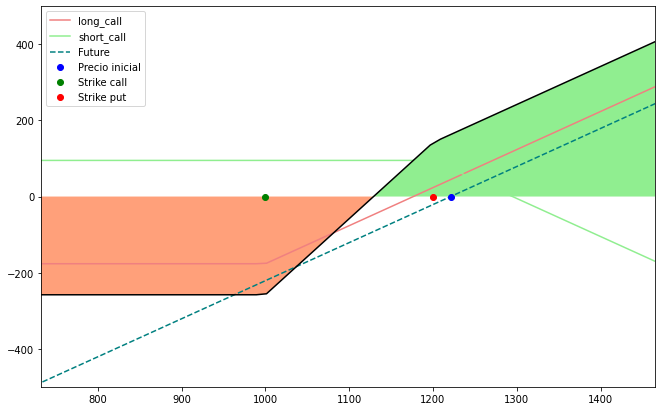

Delta P > K_call_short:  1.1099999999999999
Extrinsic P > K_call_short:  -162.94999999999987
Max Loss:  0.21140774711325858


In [7]:
# import mpld3
# # mpld3.enable_notebook()
# from mpld3 import plugins

P_entry = 1221.1

size_L=2
K_call_long = 1000
long_premium = 176.55
long_delta = 0.84

size_S=1
K_call_short = 1200
short_premium = 94.95
short_delta = 0.57

zebra_stgy(P_entry, 
           size_L, size_S,
           K_call_long, K_call_short, 
           long_premium, short_premium,
           long_delta, short_delta)

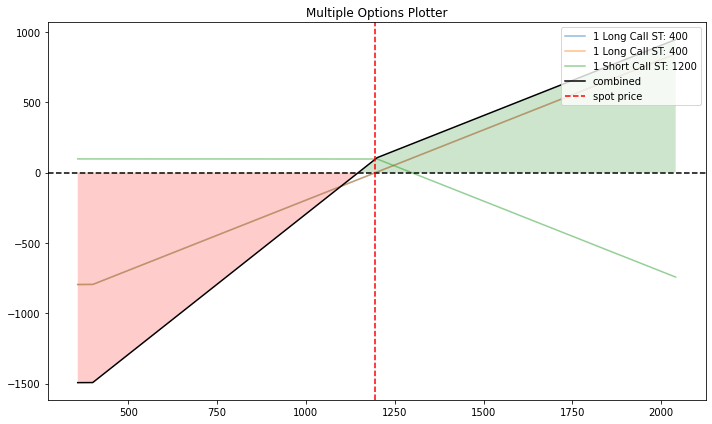

Delta P > K_call_short:  0.99
Extrinsic P > K_call_short:  -23.223524432755198
Max Loss:  1.315690385896309


In [35]:
P_entry = 1193.5

size_L=2
K_call_long = 400
long_premium = op.black_scholes(K=K_call_long, St=P_entry, r=4, t=31, 
                     v=159.65, type='c')['value']['option value']
long_delta = 1


size_S = 1
K_call_short = 1200
short_premium = 97.74
short_delta = 0.58

size_L_p = 1
K_put_long = 1200
put_premium = 76.36
put_delta = -0.43


long_ext = long_premium - max(P_entry - K_call_long,0)
short_ext = short_premium- max(P_entry - K_call_short,0)
long_put_ext = put_premium- max(K_put_long-P_entry,0)

op1={'op_type': 'c', 'strike': K_call_long, 'tr_type': 'b', 'op_pr': long_premium}#bsm_long_call['value']['option value']}
op2={'op_type': 'c', 'strike': K_call_long, 'tr_type': 'b', 'op_pr': long_premium}#bsm_long_call['value']['option value']}
op3={'op_type': 'c', 'strike': K_call_short, 'tr_type': 's', 'op_pr': short_premium}#bsm_short_call['value']['option value']}
# op4={'op_type': 'p', 'strike': K_put_long, 'tr_type': 'b', 'op_pr': put_premium}

op_list=[op1, op2, op3]#, op2, op3, op4]
op.multi_plotter(spot=P_entry,spot_range=70, op_list=op_list)
print('Delta P > K_call_short: ', 2*long_delta-short_delta+put_delta)
print('Extrinsic P > K_call_short: ', 2*long_ext-short_ext+long_put_ext)
print('Max Loss: ', (2*long_premium-short_premium+put_premium)/P_entry)

In [24]:
-(2*long_premium-short_premium+put_premium)

-1631.204640302597

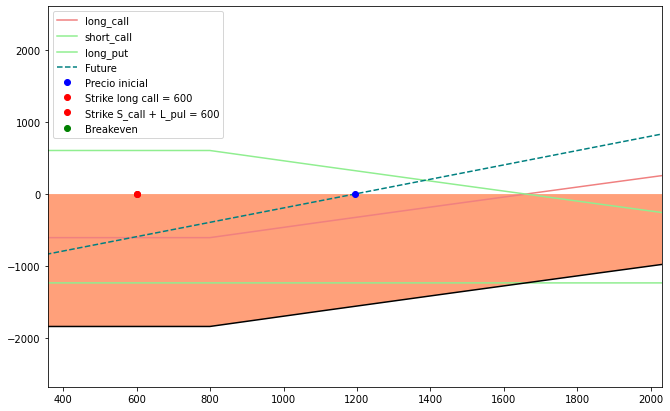

Delta P > K_call_short:  0.9142110590376777
Extrinsic P > K_call_short:  1850.4889645021349
Max Loss:  2.0477494465874613


In [26]:
size_L=2
K_call_long = 600
long_premium = op.black_scholes(K=K_call_long, St=P_entry, r=4, t=31, 
                     v=159.65, type='c')['value']['option value']
long_delta = op.black_scholes(K=K_call_long, St=P_entry, r=4, t=31, 
                     v=159.65, type='c')['greeks']['delta']
size_S = 1
size_L_p = 1
tested_zebra_stgy(P_entry, 
           size_L, size_S,size_L_p,
           K_call_long, K_call_long, K_call_long,
           long_premium, long_premium,put_premium,
           long_delta, long_delta,long_delta-1, 0.7)

In [18]:
long_delta

0.9825667499823387

In [8]:
def payoff_zebra_tilde_calc(price_change, P_entry, time_to_exp,
           size_L, size_S,size_P,
           K_call_long, K_call_short, K_put_long,
           long_call_iv, short_call_iv, long_put_iv):
    new_long_c = op.black_scholes(K=K_call_long, St=P_entry, r=4, t=time_to_exp, 
                     v=long_call_iv*time_to_exp/30, type='c')
    new_short_c = op.black_scholes(K=K_call_short, St=P_entry, r=4, t=time_to_exp, 
                     v=short_call_iv*time_to_exp/30, type='c')
    new_long_p = op.black_scholes(K=K_put_long, St=P_entry, r=4, t=time_to_exp, 
                     v=long_put_iv*time_to_exp/30, type='p')
    
    new_premium_long_c = new_long_c['value']['option value']
    new_premium_short_c = new_short_c['value']['option value']
    new_premium_long_p = new_long_p['value']['option value']
    
    new_delta_long_c = new_long_c['greeks']['delta']
    new_delta_short_c = new_short_c['greeks']['delta']
    new_delta_long_p = new_long_p['greeks']['delta']
    
    new_price = P_entry * price_change
    new_premium = size_L*new_premium_long_c-size_S*new_premium_short_c+size_P*new_premium_long_p
    
    new_delta = size_L*new_delta_long_c-size_S*new_delta_short_c+size_P*new_delta_long_p
    new_payoff = size_L*call(new_price, K_call_long, new_premium_long_c)-size_S*call(new_price, K_call_short, new_premium_short_c)+size_P*put(new_price, K_put_long, new_premium_long_p)
    return {'payoff': new_payoff, 'delta': new_delta, 'new_premiums':[new_premium_long_c,new_premium_short_c,new_premium_long_p]}

In [101]:
payoff_zebra_tilde_calc(1, P_entry, 30,
           size_L, size_S,size_L_p,
           K_call_long, K_call_short, K_put_long,
           159.65, 61,61)

{'payoff': -0.14579950697867616,
 'delta': 0.9926323888880677,
 'new_premiums': [826.142263409228, 99.07353947922832, 71.03481216775089]}

In [146]:
time_to_exp = np.arange(30, -5, -5)
price_changes = np.arange(1,-1.25, -0.25)
columns = []
table =  pd.DataFrame(index=price_changes,columns=time_to_exp)
for i in range(len(time_to_exp)):
    t = time_to_exp[i]
    columns.append('t='+str(t))
    for j in range(len(price_changes)):
        change = 1+price_changes[j]
        payoff = payoff_zebra_tilde_calc(change, P_entry, t,
               size_L, size_S,size_L_p,
               K_call_long, K_call_short, K_put_long,
               159.65, 61, 61)['payoff']
#         table[t].iloc[j] = payoff
        table[t].iloc[j] = str(round(payoff/P_entry,3)*100)+'%'
table.columns = ['t = '+str(t) for t in time_to_exp]
list_index_plus = ['+'+str(100*change)+'%' for change in price_changes if change>0]
list_index_plus.append('0.0%')
list_index_minus = [str(100*change)+'%' for change in price_changes if change<0]

table.index = list_index_plus+list_index_minus

In [147]:
table

t = 30                t = 25                t = 20  \
+100.0%                100.0%                100.1%                100.1%   
+75.0%                  75.0%                 75.1%                 75.1%   
+50.0%                  50.0%                 50.1%                 50.1%   
+25.0%                  25.0%                 25.1%                 25.1%   
0.0%                    -0.0%                  0.1%                  0.1%   
-25.0%                 -25.0%                -24.9%                -24.9%   
-50.0%                 -50.0%                -49.9%                -49.9%   
-75.0%   -59.699999999999996%  -59.599999999999994%  -59.599999999999994%   
-100.0%  -34.699999999999996%  -34.599999999999994%  -34.599999999999994%   

                       t = 15                t = 10                 t = 5  \
+100.0%                100.1%                100.0%                100.0%   
+75.0%                  75.1%                 75.0%                 75.0%   
+50.0%                  50.1%                 50.0%                 50.0%   
+25.0%                  25.1%                 25.0%                 25.0%   
0.0%                     0.1%                  0.0%                  0.0%   
-25.0%                 -24.9%                -25.0%                -25.0%   
-50.0%                 -49.9%                -50.0%                -50.0%   
-75.0%   -59.599999999999994%  -59.599999999999994%  -59.599999999999994%   
-100.0%  -34.599999999999994%  -34.599999999999994%  -34.599999999999994%   

                        t = 0  
+100.0%                100.0%  
+75.0%                  75.0%  
+50.0%                  50.0%  
+25.0%                  25.0%  
0.0%                     0.0%  
-25.0%                 -25.0%  
-50.0%                 -50.0%  
-75.0%   -59.599999999999994%  
-100.0%  -34.599999999999994%

In [53]:
 payoff_zebra_tilde_calc(change, P_entry, t,
               size_L, size_S,size_L_p,
               K_call_long, K_call_short, K_put_long,
               159.65, 61, 61)

{'payoff': -712.910522258229, 'delta': 0.9999999999999999}

In [64]:
table[0].iloc[0]

-2361.4754398095756

In [29]:
op.black_scholes(K=K_call_long, St=P_entry, r=4, t=31, 
                     v=159.65, type='c')

{'value': {'option value': 826.2923201512986,
  'intrinsic value': 824.0999999999999,
  'time value': 2.192320151298645},
 'greeks': {'delta': 0.9959023806102439,
  'gamma': 2.1255160403676583e-05,
  'theta': -0.15424782091015557,
  'vega': 0.043185299400514694,
  'rho': 0.3336039808921844}}

In [160]:
import numpy as np
from scipy.integrate import quad

def f(x):
    return np.e**(-x**2/2) #put your function to integrate here

def N(d):
    return quad(f,-np.Infinity,d)[0]/(2*np.pi)**(1/2) #integrates from 0 to infinity

def d_1(P_t, K,t,sigma,r):
    return (np.log(P_t/K)+t*(r+sigma**2/2))/(sigma*t**(1/2))

def d_2(P_t, K,t,sigma,r):
    return d_1(P_t, K,t,sigma,r)-sigma*t**1/2

def Delta(d):
    return N(d)

def Extrinsic(P_t, K, premium):
    return premium-max(P_t-K,0)

def Premium(P_t, K,t,sigma,r):
    return abs(P_t*N(d_1(P_t, K,t,sigma,r))-K*np.e**(-r*t)*N(d_2(P_t, K,t,sigma,r)))

In [161]:
from scipy.optimize import fsolve
from sympy.solvers import solve
from sympy import Symbol
import math

def equations(p):
    size_L, size_S, K_L, K_S = p
    d_1_L = d_1(P_t=P_entry, K=K_L,t=36/365,sigma=0.65,r=0.04)
    d_1_S = d_1(P_t=P_entry, K=K_S,t=36/365,sigma=0.65,r=0.04)
    d_2_L = d_2(P_t=P_entry, K=K_L,t=36/365,sigma=0.65,r=0.04)
    d_2_S = d_2(P_t=P_entry, K=K_S,t=36/365,sigma=0.65,r=0.04)
    delta = size_L*Delta(d_1_L)-size_S*Delta(d_1_S)
    premium_L = Premium(P_t=P_entry, K=K_L,t=36/365,sigma=0.65,r=0.04)
    premium_S = Premium(P_t=P_entry, K=K_S,t=36/365,sigma=0.65,r=0.04)
    extrinsic_L = Extrinsic(P_t=P_entry, K=K_L, premium=premium_L)
    extrinsic_S = Extrinsic(P_t=P_entry, K=K_S, premium=premium_S)
    extrinsic = size_L*extrinsic_L - size_S*extrinsic_S
    premium = size_L*premium_L - size_S*premium_S
    return (size_L-2, size_S-1, delta-1.1, extrinsic)

In [107]:
d_1_L = d_1(P_t=P_entry, K=K_call_long,t=32/365,sigma=0.65,r=0.04)
Delta(d_1_L)
# Premium(P_t=P_entry, K=K_call_long,t=36/365,sigma=0.65,r=0.04)


0.7773758758045295

In [141]:
P_entry = 1220.5
size_L, size_S, K_L, K_S =  fsolve(equations, (2,1,1000, 1200))

print (equations((size_L, size_S, K_L, K_S)))

(0.0, 0.0, 3.574918139293004e-13, 3.3583091862965375e-10)


In [142]:
size_L, size_S, K_L, K_S

(2.0, 1.0, 897.0128778354599, 1056.010770058236)

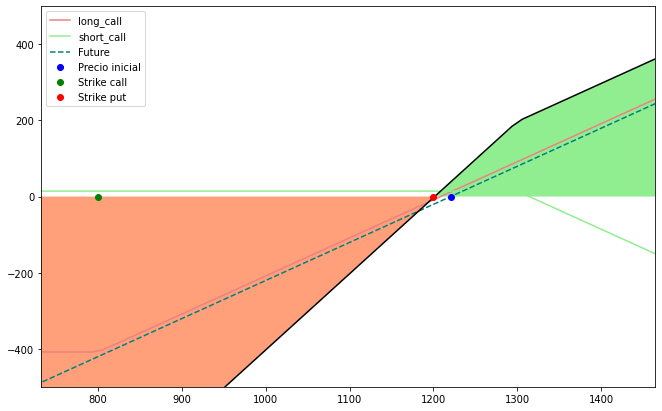

Delta P > K_call_short:  1.4793184845235903
Extrinsic P > K_call_short:  -38.184594297145736
Max Loss:  0.6577758342505975


In [162]:
# P_entry = 1221.6
long_delta = Delta(d_1(P_t=P_entry, K=K_L,t=36/365,sigma=0.86,r=0.04))

short_delta = Delta(d_2(P_t=P_entry, K=K_S,t=36/365,sigma=0.76,r=0.04))

zebra_stgy(P_entry, 
           size_L, size_S,
           K_L, K_S, 
           Premium(P_t=P_entry, K=K_L,t=36/365,sigma=0.86,r=0.04), 
           Premium(P_t=P_entry, K=K_S,t=36/365,sigma=0.76,r=0.04),
           long_delta, short_delta)

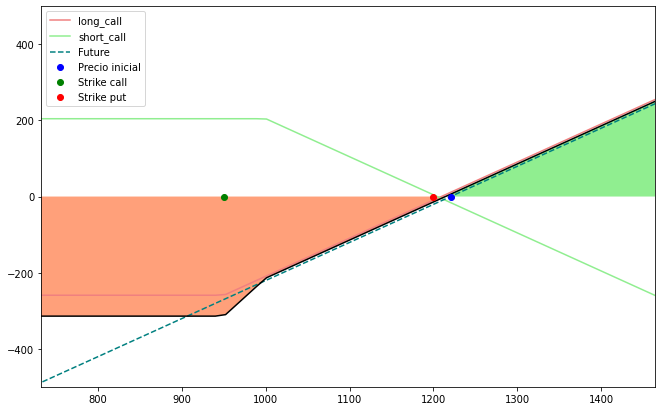

Delta P > K_call_short:  0.9855310551801918
Extrinsic P > K_call_short:  -6.2195037230940216
Max Loss:  0.25750143078812454


In [227]:
# strike = 900 --> IV = 86
# strike = 1000 --> IV = 76
# strike = 1100 --> IV = 66
# strike = 1200 --> IV = 60
# strike = 1300 --> IV = 58
# Then 800 --> IV = 96
# Then 700 --> IV = 106
# Then 600 --> IV = 116
# Then 500 --> IV = 126

K_L=950
sigma_L = 0.6
K_S=1000
sigma_S = 0.6
zebra_stgy(P_entry, 
           2, 1,
           K_L, K_S, 
           Premium(P_t=P_entry, K=K_L,t=32/365,sigma=sigma_L,r=0.04), 
           Premium(P_t=P_entry, K=K_S,t=32/365,sigma=sigma_S,r=0.04),
           Delta(d_1(P_t=P_entry, K=K_L,t=32/365,sigma=sigma_L,r=0.04)), 
           Delta(d_2(P_t=P_entry, K=K_S,t=32/365,sigma=sigma_S,r=0.04)))

In [170]:
Premium(P_t=P_entry, K=1000,t=32/365,sigma=0.84,r=0.04)

194.6664560955454

In [171]:
Premium(P_t=P_entry, K=800,t=32/365,sigma=0.94,r=0.04)

406.55260944493557

In [223]:
order_books[76]

{'underlying_price': 1217.21,
 'underlying_index': 'ETH-27JAN23',
 'timestamp': 1672044184606,
 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None},
 'state': 'open',
 'settlement_price': 0.589653,
 'open_interest': 250.0,
 'min_price': 0.0895,
 'max_price': 1.089,
 'mark_price': 0.5892,
 'mark_iv': 1.0,
 'last_price': 0.5852,
 'interest_rate': 0.0,
 'instrument_name': 'ETH-27JAN23-500-C',
 'index_price': 1219.44,
 'greeks': {'vega': 0.0,
  'theta': 0.0,
  'rho': 0.43795,
  'gamma': 0.0,
  'delta': 1.0},
 'estimated_delivery_price': 1219.44,
 'change_id': 3033726302,
 'bids': [],
 'bid_iv': 0.0,
 'best_bid_price': 0.0,
 'best_bid_amount': 0.0,
 'best_ask_price': 0.0,
 'best_ask_amount': 0.0,
 'asks': [],
 'ask_iv': 0.0}

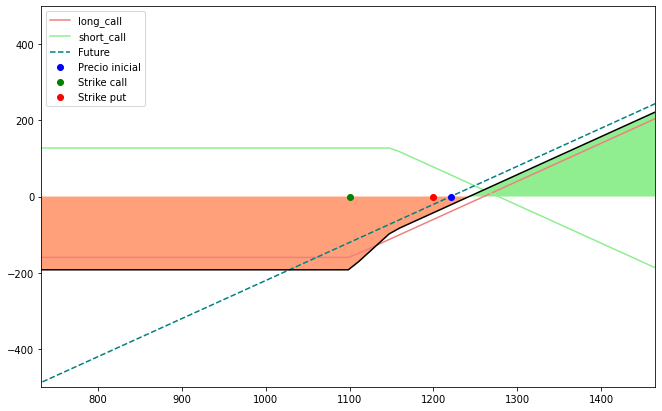

Delta P > K_call_short:  0.8099999999999999
Extrinsic P > K_call_short:  22.019999999999996
Max Loss:  0.15773863170831626


In [230]:
zebra_stgy(P_entry, 
           2, 1,
           1100, 1150, 
           160,
           127.48,
           0.73,
          0.65)

In [124]:
Premium(P_t=P_entry, K=1000,t=32/365,sigma=0.75,r=0.04)

195.08978559406285

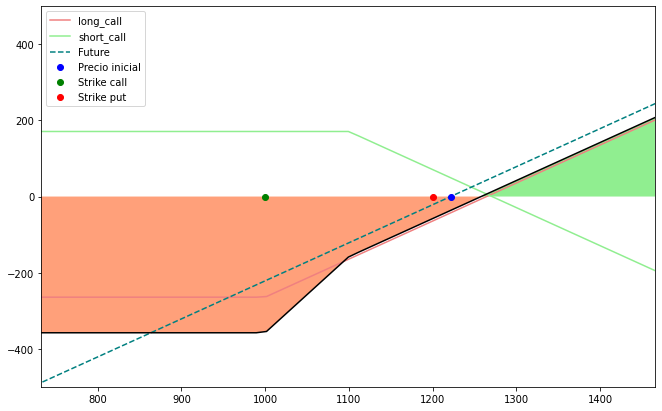

Delta P > K_call_short:  0.9299999999999999
Extrinsic P > K_call_short:  36.41000000000011
Max Loss:  0.29306647020301246


In [55]:
size_L=2
K_call_long = 1000
long_premium = 264.49
long_delta = 0.83

size_S=1
K_call_short = 1100
short_premium = 170.97
short_delta = 0.73

zebra_stgy(P_entry, 
           size_L, size_S,
           K_call_long, K_call_short, 
           long_premium, short_premium,
           long_delta, short_delta)

In [30]:
print("Price: ", P_entry)
print("\n")
print("Size_L: ",size_L)
print("K_L: ",round(K_L),3)
print("Premium_L: ", round(Premium(P_t=P_entry, K=K_L,t=36/365,sigma=0.86,r=0.04),3))
print("Delta_L: ",round(long_delta,3))
print("\n")
print("Size_S: ",size_S)
print("K_S: ", round(K_S),3)
print("Premium_S: ", round(Premium(P_t=P_entry, K=K_S,t=36/365,sigma=0.76,r=0.04),3))
print("Delta_S: ", round(short_delta,3))

Price:  1221.6


Size_L:  2.0
K_L:  851 3
Premium_L:  353.618
Delta_L:  0.932


Size_S:  1.0
K_S:  909 3
Premium_S:  294.931
Delta_S:  0.909


In [232]:
Premium(P_t=P_entry, K=K_S,t=36/365,sigma=0.76,r=0.04)

313.85866534361355

### Get data from Deribit

In [9]:

import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import urllib.request, json

In [353]:

def get_all_instruments():
  url = f"https://test.deribit.com/api/v2/public/get_instruments"
  with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
  return data

# Get a list of all active BTC options from the Deribit API.
def get_all_active_options(instrument_name="ETH"):
    import urllib.request, json
    url =  f"https://test.deribit.com/api/v2/public/get_instruments?currency={instrument_name}&kind=option&expired=false"
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
    data = pd.DataFrame(data['result']).set_index('instrument_name')
    data['creation_date'] = pd.to_datetime(data['creation_timestamp'], unit='ms')
    data['expiration_date'] = pd.to_datetime(data['expiration_timestamp'], unit='ms')
    print(f'{data.shape[0]} active options.')
    return data

# Filter options based on data available from 'get_instruments'
def filter_options(price, active_options):
    # price is the current price of BTC
    
    #Get Put/Call information
    pc = active_options.index.str.strip().str[-1]
    
    # Set "moneyness"
    active_options['m'] = np.log(active_options['strike']/price)
    active_options.loc[pc=='P','m'] = -active_options['m']
    # Set days until expiration
    active_options['t'] = (active_options['expiration_date']-pd.Timestamp.today()).dt.days
    
    # Only include options that are less than 30% from the current price and have less than 91 days until expiration
    active_options = active_options.query('m>0 & m<.3 & t<91')
    
    print(f'{active_options.shape[0]} active options after filter.')
    return active_options

# Get Tick data for a given instrument from the Deribit API
def get_tick_data(instrument_name="ETH"):
    import urllib.request, json
    url =  f"https://test.deribit.com/api/v2/public/ticker?instrument_name={instrument_name}"
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
    data = pd.json_normalize(data['result'])
    data.index = [instrument_name]
    return data

# Loop through all filtered options to get the current 'ticker' datas
def get_all_option_data(instrument_name="ETH"):
    option_data = get_tick_data(f'{instrument_name}-PERPETUAL')
    options = filter_options(option_data['last_price'][0], get_all_active_options(instrument_name))
    for o in options.index:
        option_data = option_data.append(get_tick_data(o))
    return option_data



In [354]:
instrument_name = "ETH"
option_data = get_all_option_data(instrument_name)

400 active options.
68 active options after filter.


In [385]:
### Add additional metrics to data
option_data['daystoexpiration'] = np.nan; option_data['t'] = np.nan; option_data['strike'] = np.nan; option_data['callput'] = np.nan
# Calculated days until expiration
#option_data.loc[1:,'t'] = (pd.to_datetime(option_data[1:].index.map(lambda x: x.split('-')[1]))-pd.Timestamp.today()).days
option_data.loc[1:,'daystoexpiration'] = (pd.to_datetime(option_data[1:].index.map(lambda x: x.split('-')[1]))-pd.Timestamp.today()).days
option_data.loc[1:,'t'] = option_data[1:].index.map(lambda x: x.split('-')[1]).astype(str)
# Pull strike from instrument name
option_data.loc[1:,'strike'] = option_data[1:].index.map(lambda x: x.split('-')[2]).astype(int)
# pull callput
option_data.loc[1:, 'callput'] = option_data[1:].index.map(lambda x: x.split('-')[3]).astype(str)
# Calculate "moneyness"
option_data['m'] = np.log(option_data['last_price'][0]/option_data['strike'])

In [386]:
puts = [i.endswith('P') for i in option_data.instrument_name]

In [390]:
puts_data_ = option_data[option_data.callput == 'P']

In [407]:
puts_data_.keys()

Index(['timestamp', 'state', 'settlement_price', 'open_interest', 'min_price',
       'max_price', 'mark_price', 'last_price', 'interest_value',
       'instrument_name', 'index_price', 'funding_8h',
       'estimated_delivery_price', 'current_funding', 'best_bid_price',
       'best_bid_amount', 'best_ask_price', 'best_ask_amount',
       'stats.volume_usd', 'stats.volume', 'stats.price_change', 'stats.low',
       'stats.high', 'underlying_price', 'underlying_index', 'mark_iv',
       'interest_rate', 'bid_iv', 'ask_iv', 'greeks.vega', 'greeks.theta',
       'greeks.rho', 'greeks.gamma', 'greeks.delta', 'daystoexpiration', 't',
       'strike', 'callput', 'm'],
      dtype='object')

In [409]:
puts_data_.interest_rate

ETH-3JAN23-1000-P     0.0
ETH-3JAN23-1050-P     0.0
ETH-3JAN23-1100-P     0.0
ETH-3JAN23-1125-P     0.0
ETH-3JAN23-1150-P     0.0
ETH-3JAN23-1175-P     0.0
ETH-3JAN23-1200-P     0.0
ETH-4JAN23-1000-P     0.0
ETH-4JAN23-1050-P     0.0
ETH-4JAN23-1100-P     0.0
ETH-4JAN23-1125-P     0.0
ETH-4JAN23-1150-P     0.0
ETH-4JAN23-1175-P     0.0
ETH-4JAN23-1200-P     0.0
ETH-6JAN23-1000-P     0.0
ETH-6JAN23-1100-P     0.0
ETH-6JAN23-1200-P     0.0
ETH-13JAN23-1000-P    0.0
ETH-13JAN23-1100-P    0.0
ETH-13JAN23-1200-P    0.0
ETH-20JAN23-1000-P    0.0
ETH-20JAN23-1100-P    0.0
ETH-20JAN23-1200-P    0.0
ETH-27JAN23-1000-P    0.0
ETH-27JAN23-1100-P    0.0
ETH-27JAN23-1200-P    0.0
ETH-24FEB23-1000-P    0.0
ETH-24FEB23-1100-P    0.0
ETH-24FEB23-1200-P    0.0
ETH-31MAR23-1000-P    0.0
ETH-31MAR23-1100-P    0.0
ETH-31MAR23-1200-P    0.0
Name: interest_rate, dtype: float64

In [402]:
puts_data_[['strike','daystoexpiration','greeks.vega', 'greeks.theta',
       'greeks.rho', 'greeks.gamma', 'greeks.delta']]

strike  daystoexpiration  greeks.vega  greeks.theta  \
ETH-3JAN23-1000-P   1000.0               0.0      0.00845      -0.13738   
ETH-3JAN23-1050-P   1050.0               0.0      0.03033      -0.66337   
ETH-3JAN23-1100-P   1100.0               0.0      0.04956      -0.99907   
ETH-3JAN23-1125-P   1125.0               0.0      0.06050      -1.08914   
ETH-3JAN23-1150-P   1150.0               0.0      0.17900     -10.38877   
ETH-3JAN23-1175-P   1175.0               0.0      0.20943     -12.07027   
ETH-3JAN23-1200-P   1200.0               0.0      0.23799     -10.00822   
ETH-4JAN23-1000-P   1000.0               1.0      0.01208      -0.13747   
ETH-4JAN23-1050-P   1050.0               1.0      0.04334      -0.66385   
ETH-4JAN23-1100-P   1100.0               1.0      0.07085      -1.00009   
ETH-4JAN23-1125-P   1125.0               1.0      0.21838      -6.12533   
ETH-4JAN23-1150-P   1150.0               1.0      0.25576      -6.23257   
ETH-4JAN23-1175-P   1175.0               1.0      0.29924      -6.14869   
ETH-4JAN23-1200-P   1200.0               1.0      0.34008      -5.11153   
ETH-6JAN23-1000-P   1000.0               3.0      0.00083      -0.00285   
ETH-6JAN23-1100-P   1100.0               3.0      0.13815      -1.04554   
ETH-6JAN23-1200-P   1200.0               3.0      0.47704      -2.11944   
ETH-13JAN23-1000-P  1000.0              10.0      0.23658      -0.73069   
ETH-13JAN23-1100-P  1100.0              10.0      0.44847      -0.92325   
ETH-13JAN23-1200-P  1200.0              10.0      0.82566      -1.04217   
ETH-20JAN23-1000-P  1000.0              17.0      0.40954      -0.73004   
ETH-20JAN23-1100-P  1100.0              17.0      0.69475      -0.90947   
ETH-20JAN23-1200-P  1200.0              17.0      1.06196      -1.08865   
ETH-27JAN23-1000-P  1000.0              24.0      0.46670      -0.51740   
ETH-27JAN23-1100-P  1100.0              24.0      0.79994      -0.66924   
ETH-27JAN23-1200-P  1200.0              24.0      1.24722      -0.85294   
ETH-24FEB23-1000-P  1000.0              52.0      0.52576      -0.15363   
ETH-24FEB23-1100-P  1100.0              52.0      1.11928      -0.24617   
ETH-24FEB23-1200-P  1200.0              52.0      1.74926      -2.44631   
ETH-31MAR23-1000-P  1000.0              87.0      1.84461      -0.78617   
ETH-31MAR23-1100-P  1100.0              87.0      2.14237      -0.87738   
ETH-31MAR23-1200-P  1200.0              87.0      2.32868      -0.93046   

                    greeks.rho  greeks.gamma  greeks.delta  
ETH-3JAN23-1000-P     -0.00015       0.00015      -0.00465  
ETH-3JAN23-1050-P     -0.00066       0.00055      -0.02010  
ETH-3JAN23-1100-P     -0.00119       0.00117      -0.03622  
ETH-3JAN23-1125-P     -0.00151       0.00173      -0.04632  
ETH-3JAN23-1150-P     -0.00695       0.00337      -0.20855  
ETH-3JAN23-1175-P     -0.00926       0.00467      -0.27866  
ETH-3JAN23-1200-P     -0.01264       0.00728      -0.38292  
ETH-4JAN23-1000-P     -0.00031       0.00015      -0.00465  
ETH-4JAN23-1050-P     -0.00135       0.00056      -0.02013  
ETH-4JAN23-1100-P     -0.00242       0.00117      -0.03628  
ETH-4JAN23-1125-P     -0.01104       0.00250      -0.16198  
ETH-4JAN23-1150-P     -0.01419       0.00337      -0.20882  
ETH-4JAN23-1175-P     -0.01891       0.00468      -0.27908  
ETH-4JAN23-1200-P     -0.02585       0.00727      -0.38398  
ETH-6JAN23-1000-P     -0.00002       0.00001      -0.00017  
ETH-6JAN23-1100-P     -0.00727       0.00144      -0.05373  
ETH-6JAN23-1200-P     -0.04984       0.00847      -0.36866  
ETH-13JAN23-1000-P    -0.02148       0.00081      -0.05684  
ETH-13JAN23-1100-P    -0.05023       0.00231      -0.13436  
ETH-13JAN23-1200-P    -0.19432       0.00695      -0.52008  
ETH-20JAN23-1000-P    -0.05277       0.00089      -0.08326  
ETH-20JAN23-1100-P    -0.11136       0.00207      -0.17729  
ETH-20JAN23-1200-P    -0.29300       0.00404      -0.46361  
ETH-27JAN23-1000-P    -0.06998       0.00084      -0.07880  
ETH-27JAN23-1100-P 

In [400]:
import numpy as np
from scipy.stats import norm

N_prime = norm.pdf
N = norm.cdf


def black_scholes_call(S, K, T, r, sigma):
    '''

    :param S: Asset price
    :param K: Strike price
    :param T: Time to maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: call price
    '''

    ###standard black-scholes formula
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = S * N(d1) -  N(d2)* K * np.exp(-r * T)
    return call


In [437]:
puts_data_.mark_price

ETH-3JAN23-1000-P     0.0001
ETH-3JAN23-1050-P     0.0005
ETH-3JAN23-1100-P     0.0008
ETH-3JAN23-1125-P     0.0009
ETH-3JAN23-1150-P     0.0086
ETH-3JAN23-1175-P     0.0105
ETH-3JAN23-1200-P     0.0118
ETH-4JAN23-1000-P     0.0001
ETH-4JAN23-1050-P     0.0005
ETH-4JAN23-1100-P     0.0008
ETH-4JAN23-1125-P     0.0072
ETH-4JAN23-1150-P     0.0086
ETH-4JAN23-1175-P     0.0105
ETH-4JAN23-1200-P     0.0119
ETH-6JAN23-1000-P     0.0000
ETH-6JAN23-1100-P     0.0015
ETH-6JAN23-1200-P     0.0095
ETH-13JAN23-1000-P    0.0030
ETH-13JAN23-1100-P    0.0055
ETH-13JAN23-1200-P    0.0210
ETH-20JAN23-1000-P    0.0057
ETH-20JAN23-1100-P    0.0105
ETH-20JAN23-1200-P    0.0305
ETH-27JAN23-1000-P    0.0055
ETH-27JAN23-1100-P    0.0104
ETH-27JAN23-1200-P    0.0299
ETH-24FEB23-1000-P    0.0030
ETH-24FEB23-1100-P    0.0079
ETH-24FEB23-1200-P    0.2244
ETH-31MAR23-1000-P    0.0624
ETH-31MAR23-1100-P    0.0914
ETH-31MAR23-1200-P    0.1299
Name: mark_price, dtype: float64

In [443]:
puts_data_['Bs_price'] = black_scholes_call(puts_data_.underlying_price, puts_data_.strike, puts_data_.daystoexpiration, puts_data_.interest_rate, 0.8303)
vols_a = []
for row in puts_data_.itertuples():
    sigma = puts_data_.loc[str(row.instrument_name)]['mark_iv'] / 100
    V = black_scholes_call(row.underlying_price, row.strike , row.daystoexpiration, 0, float(sigma))
    vols_a.append(sigma)
    print('#'*50)
    print(f'Calculated BS {V}')
    print(f'From api call {row.mark_price*row.underlying_price}')
    print('STRIKE = ', row.strike)

calls['implied_vol_ask'] = vols_a

##################################################
Calculated BS 214.41100000000006
From api call 0.12144110000000001
STRIKE =  1000.0
##################################################
Calculated BS 164.41100000000006
From api call 0.6072055000000001
STRIKE =  1050.0
##################################################
Calculated BS 114.41100000000006
From api call 0.9715288000000001
STRIKE =  1100.0
##################################################
Calculated BS 89.40100000000007
From api call 1.0929609
STRIKE =  1125.0
##################################################
Calculated BS 64.40100000000007
From api call 10.4438486
STRIKE =  1150.0
##################################################
Calculated BS 39.40100000000007
From api call 12.751210500000001
STRIKE =  1175.0
##################################################
Calculated BS 14.401000000000067
From api call 14.3299318
STRIKE =  1200.0
##################################################
Calculated BS 550.9786451783345
From a

TypeError: list indices must be integers or slices, not str

In [433]:
for row in puts_data_.itertuples():
    print(row.t)

3JAN23
3JAN23
3JAN23
3JAN23
3JAN23
3JAN23
3JAN23
4JAN23
4JAN23
4JAN23
4JAN23
4JAN23
4JAN23
4JAN23
6JAN23
6JAN23
6JAN23
13JAN23
13JAN23
13JAN23
20JAN23
20JAN23
20JAN23
27JAN23
27JAN23
27JAN23
24FEB23
24FEB23
24FEB23
31MAR23
31MAR23
31MAR23


In [425]:
puts_data_.loc['ETH-3JAN23-1000-P']['ask_iv']/100


0.0

In [192]:
import pandas as pd
import requests
import asyncio
# from tardis_client import TardisClient, Channel
# from tardis_dev import datasets, get_exchange_details
from pprint import pprint

class Deribit(object):
    url = "https://test.deribit.com/api/v2/public/"

    def get_instruments(self):
        url = self.url + "get_instruments"
#         resp = requests.get(url, params={'kind': 'option', 'currency': 'BTC'})
        resp = requests.get(url, params={'kind': 'option', 'currency': 'ETH'})
        result = resp.json()['result']
        instrument_names = []
        for data in result:
            instrument_name = data['instrument_name']
            pprint(data)
            if 'P' not in instrument_name:
                instrument_names.append(instrument_name)

        print(instrument_names)
        return instrument_names

    def get_order_book(self, instrument_names):
        url = self.url + "get_order_book"
        order_books = []
        for i, instrument_name in enumerate(instrument_names):
            order_books.append(requests.get(url, params={'instrument_name': instrument_name}).json()['result'])
            # if i == 5:
            #     break
        pprint(order_books)
        return order_books

    def create_csv(self, order_books):
        for order_book in order_books:
            df_bids = pd.DataFrame(
                data=order_book['bids'],
                columns=['price',
                         'amount']
            )

            df_asks = pd.DataFrame(
                data=order_book['asks'],
                columns=['price',
                         'amount']
            )

            df_bids.to_csv('/Users/prithvirajmurthy/Desktop/blockchain/cruize/scripts/scripts/BTC_Derbit_bids.csv', mode='a', header=False)
            df_asks.to_csv(
                '/Users/prithvirajmurthy/Desktop/blockchain/cruize/scripts/scripts/BTC_Derbit_asks.csv', mode='a', header=False)

    # def deribit_hist(self):
    #     # # pip install tardis-client
    #     # import asyncio
    #     # from tardis_client import TardisClient, Channel
    #     # tardis_client = TardisClient(api_key="YOUR_API_KEY")
    #     #
    #     # async def replay():
    #     #     # replay method returns Async Generator
    #     #     messages = tardis_client.replay(
    #     #         exchange="deribit",
    #     #         from_date="2019-07-01",
    #     #         to_date="2019-07-02",
    #     #         filters=[Channel(name="book", symbols=["OPTIONS"])]
    #     #     )
    #     #
    #     #     # messages as provided by Deribit real-time stream
    #     #     async for local_timestamp, message in messages:
    #     #         print(message)
    #     #
    #     # asyncio.run(replay())
    #
    #     # pip install tardis-client
    #     # import asyncio
    #     # from tardis_client import TardisClient, Channel
    #     # tardis_client = TardisClient(api_key="YOUR_API_KEY")
    #     #
    #     # async def replay():
    #     #     # replay method returns Async Generator
    #     #     messages = tardis_client.replay(
    #     #         exchange="okex-options",
    #     #         from_date="2020-02-01",
    #     #         to_date="2020-02-02",
    #     #         filters=[Channel(name="option/trade", symbols=[])]
    #     #     )
    #     #
    #     #     # messages as provided by OKEx real-time stream
    #     #     async for local_timestamp, message in messages:
    #     #         print(message)
    #     #
    #     # asyncio.run(replay())
    #
    #     # requires Python >=3.6
    #     # pip install tardis-dev
    #
    #     import logging
    #
    #     # optionally enable debug logs
    #     # logging.basicConfig(level=logging.DEBUG)
    #
    #     exchange = 'deribit'
    #     exchange_details = get_exchange_details(exchange)
    #
    #     # iterate over and download all data for every symbol
    #     for symbol in exchange_details["datasets"]["symbols"]:
    #         # alternatively specify datatypes explicitly ['trades', 'incremental_book_L2', 'quotes'] etc
    #         # see available options https://docs.tardis.dev/downloadable-csv-files#data-types
    #         data_types = symbol["dataTypes"]
    #         symbol_id = symbol["id"]
    #         from_date = symbol["availableSince"]
    #         to_date = symbol["availableTo"]
    #
    #         print('symbol:: ', symbol_id)
    #         # skip groupped symbols
    #         if symbol_id in ['PERPETUALS', 'SPOT', 'FUTURES']:
    #             continue
    #
    #         print(f"Downloading {exchange} {data_types} for {symbol_id} from {from_date} to {to_date}")
    #
    #         # each CSV dataset format is documented at https://docs.tardis.dev/downloadable-csv-files#data-types
    #         # see https://docs.tardis.dev/downloadable-csv-files#download-via-client-libraries for full options docs
    #         datasets.download(
    #             exchange=exchange,
    #             data_types=data_types,
    #             from_date=from_date,
    #             to_date=to_date,
    #             symbols=[symbol_id],
    #             # TODO set your API key here
    #             api_key="YOUR_API_KEY",
    #             # path where CSV data will be downloaded into
    #             download_dir="./datasets",
    #         )



In [203]:
if __name__ == '__main__':
    d = Deribit()
    instruments = d.get_instruments()
    order_books = d.get_order_book(instruments)
    # d.create_csv(order_books)

    # d.deribit_hist()

{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1671955202000,
 'expiration_timestamp': 1672128000000,
 'instrument_id': 144755,
 'instrument_name': 'ETH-27DEC22-800-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.0003,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'day',
 'strike': 800.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1671955202000,
 'expiration_timestamp': 1672128000000,
 'instrument_id': 144756,
 'instrument_name': 'ETH-27DEC22-800-P',
 'is_active': True,
 'kind':

 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1672041660000,
 'expiration_timestamp': 1672214400000,
 'instrument_id': 144821,
 'instrument_name': 'ETH-28DEC22-1125-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.0003,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'day',
 'strike': 1125.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1672041660000,
 'expiration_timestamp': 1672214400000,
 'instrument_id': 144822,
 'instrument_name': 'ETH-28DEC22-1125-P',
 'is_active': True,
 'kind': 'option',
 'maker_com

{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1640764802000,
 'expiration_timestamp': 1672387200000,
 'instrument_id': 125320,
 'instrument_name': 'ETH-30DEC22-2000-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 2000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1660181340000,
 'expiration_timestamp': 1672387200000,
 'instrument_id': 134175,
 'instrument_name': 'ETH-30DEC22-2100-C',
 'is_active': True,
 'k

 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'week',
 'strike': 1000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1671091202000,
 'expiration_timestamp': 1672992000000,
 'instrument_id': 144159,
 'instrument_name': 'ETH-6JAN23-1000-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'week',
 'strike': 1000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_

 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1300.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1667932920000,
 'expiration_timestamp': 1674806400000,
 'instrument_id': 141759,
 'instrument_name': 'ETH-27JAN23-1300-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1300.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1666771202000

 'strike': 600.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1669190402000,
 'expiration_timestamp': 1677225600000,
 'instrument_id': 142812,
 'instrument_name': 'ETH-24FEB23-800-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 800.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1669190402000,
 'expiration_timestamp': 1677225600000,
 'instrument_id': 1428

 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1659379680000,
 'expiration_timestamp': 1680249600000,
 'instrument_id': 133434,
 'instrument_name': 'ETH-31MAR23-1300-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1300.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1659379680000,
 'expiration_timestamp': 1680249600000,
 'instrument_id': 133435,
 'instrument_name': 'ETH-31MAR23-1300-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_am

{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1648022402000,
 'expiration_timestamp': 1680249600000,
 'instrument_id': 126270,
 'instrument_name': 'ETH-31MAR23-3000-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 3000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1659020654000,
 'expiration_timestamp': 1680249600000,
 'instrument_id': 132980,
 'instrument_name': 'ETH-31MAR23-3200-C',
 'is_active': True,
 'k

 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1100.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1659020460000,
 'expiration_timestamp': 1688112000000,
 'instrument_id': 132918,
 'instrument_name': 'ETH-30JUN23-1200-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1200.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0

 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1657988100000,
 'expiration_timestamp': 1688112000000,
 'instrument_id': 131947,
 'instrument_name': 'ETH-30JUN23-3000-P',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 3000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1659020460000,
 'expiration_timestamp': 1688112000000,
 'instrument_id': 132940,
 'instrument_name': 'ETH-30JUN23-3200-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_curr

 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1500.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 1.0,
 'counter_currency': 'USD',
 'creation_timestamp': 1664352060000,
 'expiration_timestamp': 1695974400000,
 'instrument_id': 138410,
 'instrument_name': 'ETH-29SEP23-1600-C',
 'is_active': True,
 'kind': 'option',
 'maker_commission': 0.00029,
 'min_trade_amount': 1,
 'option_type': 'call',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 1600.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
{'base_currency': 'ETH',
 'block_trade_commission': 0.00015,
 'block_trade_min_trade_amount': 250,
 'block_trade_tick_size': 0.0001,
 'contract_size': 

 'min_trade_amount': 1,
 'option_type': 'put',
 'price_index': 'eth_usd',
 'quote_currency': 'ETH',
 'rfq': False,
 'settlement_currency': 'ETH',
 'settlement_period': 'month',
 'strike': 8000.0,
 'taker_commission': 0.00029,
 'tick_size': 0.0005}
['ETH-27DEC22-800-C', 'ETH-27DEC22-900-C', 'ETH-27DEC22-1000-C', 'ETH-27DEC22-1050-C', 'ETH-27DEC22-1100-C', 'ETH-27DEC22-1125-C', 'ETH-27DEC22-1150-C', 'ETH-27DEC22-1175-C', 'ETH-27DEC22-1200-C', 'ETH-27DEC22-1225-C', 'ETH-27DEC22-1250-C', 'ETH-27DEC22-1275-C', 'ETH-27DEC22-1300-C', 'ETH-27DEC22-1350-C', 'ETH-27DEC22-1400-C', 'ETH-28DEC22-800-C', 'ETH-28DEC22-900-C', 'ETH-28DEC22-1000-C', 'ETH-28DEC22-1050-C', 'ETH-28DEC22-1100-C', 'ETH-28DEC22-1125-C', 'ETH-28DEC22-1150-C', 'ETH-28DEC22-1175-C', 'ETH-28DEC22-1200-C', 'ETH-28DEC22-1225-C', 'ETH-28DEC22-1250-C', 'ETH-28DEC22-1275-C', 'ETH-28DEC22-1300-C', 'ETH-28DEC22-1350-C', 'ETH-28DEC22-1400-C', 'ETH-30DEC22-1000-C', 'ETH-30DEC22-1100-C', 'ETH-30DEC22-1200-C', 'ETH-30DEC22-1300-C', 'ETH-30

  'greeks': {'delta': 0.00011,
             'gamma': 1e-05,
             'rho': 1e-05,
             'theta': -0.00125,
             'vega': 0.0004},
  'index_price': 1219.44,
  'instrument_name': 'ETH-28DEC22-1400-C',
  'interest_rate': 0.0,
  'last_price': None,
  'mark_iv': 50.69,
  'mark_price': 0.0,
  'max_price': 0.5,
  'min_price': 0.0001,
  'open_interest': 0.0,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044184608,
  'underlying_index': 'SYN.ETH-28DEC22',
  'underlying_price': 1219.7031},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 10.0,
  'best_bid_price': 0.0005,
  'bid_iv': 0.0,
  'bids': [[0.0005, 10.0]],
  'change_id': 3154003975,
  'estimated_delivery_price': 1219.44,
  'greeks': {'delta': 1.0,
             'gamma': 0.0,
             'rho': 0.10877,
             'theta': 0.0,
             'vega': 0.0},
  'index_price': 1219.44,
  'instrument_n

  'interest_rate': 0.0,
  'last_price': 0.2512,
  'mark_iv': 42.26,
  'mark_price': 0.2583,
  'max_price': 0.758,
  'min_price': 0.0001,
  'open_interest': 250.0,
  'settlement_price': 0.258289,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044184606,
  'underlying_index': 'ETH-6JAN23',
  'underlying_price': 1213.43},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 0,
  'estimated_delivery_price': 1219.44,
  'greeks': {'delta': 0.99994,
             'gamma': 0.0,
             'rho': 0.30053,
             'theta': -0.00064,
             'vega': 0.00049},
  'index_price': 1219.44,
  'instrument_name': 'ETH-6JAN23-1000-C',
  'interest_rate': 0.0,
  'last_price': None,
  'mark_iv': 29.09,
  'mark_price': 0.1759,
  'max_price': 0.6755,
  'min_price': 0.0001,
  'open_interest': 0.0,
  'settleme

             'rho': 0.00203,
             'theta': -0.02956,
             'vega': 0.02325},
  'index_price': 1219.44,
  'instrument_name': 'ETH-27JAN23-2500-C',
  'interest_rate': 0.0,
  'last_price': None,
  'mark_iv': 81.27,
  'mark_price': 0.0001,
  'max_price': 0.5,
  'min_price': 0.0001,
  'open_interest': 0.0,
  'settlement_price': 0.000137,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044184607,
  'underlying_index': 'ETH-27JAN23',
  'underlying_price': 1217.21},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 3153930434,
  'estimated_delivery_price': 1219.44,
  'greeks': {'delta': 0.0012,
             'gamma': 1e-05,
             'rho': 0.0012,
             'theta': -0.01826,
             'vega': 0.01437},
  'index_price': 1219.44,
  'instrument_name': 'ETH-27JAN23-2600-C',
  'in

 {'ask_iv': 453.25,
  'asks': [[0.744, 1.0]],
  'best_ask_amount': 1.0,
  'best_ask_price': 0.744,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 3155373357,
  'estimated_delivery_price': 1219.45,
  'greeks': {'delta': 0.51585,
             'gamma': 0.00081,
             'rho': 1.20689,
             'theta': -1.0383,
             'vega': 2.47315},
  'index_price': 1219.45,
  'instrument_name': 'ETH-31MAR23-1300-C',
  'interest_rate': 0.0,
  'last_price': 0.2035,
  'mark_iv': 79.74,
  'mark_price': 0.1345,
  'max_price': 0.6345,
  'min_price': 0.0001,
  'open_interest': 10.0,
  'settlement_price': 0.134921,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044203742,
  'underlying_index': 'ETH-31MAR23',
  'underlying_price': 1216.29},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_

             'theta': -0.02909,
             'vega': 0.03684},
  'index_price': 1219.44,
  'instrument_name': 'ETH-31MAR23-15000-C',
  'interest_rate': 0.0,
  'last_price': 0.0004,
  'mark_iv': 150.0,
  'mark_price': 0.0003,
  'max_price': 0.5,
  'min_price': 0.0001,
  'open_interest': 511.0,
  'settlement_price': 0.000344,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044206761,
  'underlying_index': 'ETH-31MAR23',
  'underlying_price': 1216.28},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 3152565848,
  'estimated_delivery_price': 1219.44,
  'greeks': {'delta': 0.82263,
             'gamma': 0.00026,
             'rho': 2.20685,
             'theta': -0.70106,
             'vega': 2.26582},
  'index_price': 1219.44,
  'instrument_name': 'ETH-30JUN23-800-C',
  'interest_rate': 0.0,
  

  'best_ask_amount': 8.0,
  'best_ask_price': 0.141,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 3153930456,
  'estimated_delivery_price': 1219.47,
  'greeks': {'delta': 0.02478,
             'gamma': 8e-05,
             'rho': 0.12448,
             'theta': -0.11808,
             'vega': 0.50561},
  'index_price': 1219.47,
  'instrument_name': 'ETH-30JUN23-5000-C',
  'interest_rate': 0.0,
  'last_price': 0.018,
  'mark_iv': 86.86,
  'mark_price': 0.0048,
  'max_price': 0.5045,
  'min_price': 0.0001,
  'open_interest': 2.0,
  'settlement_price': 0.004775,
  'state': 'open',
  'stats': {'high': None, 'low': None, 'price_change': None, 'volume': None},
  'timestamp': 1672044211799,
  'underlying_index': 'ETH-30JUN23',
  'underlying_price': 1221.03},
 {'ask_iv': 0.0,
  'asks': [],
  'best_ask_amount': 0.0,
  'best_ask_price': 0.0,
  'best_bid_amount': 0.0,
  'best_bid_price': 0.0,
  'bid_iv': 0.0,
  'bids': [],
  'change_id': 3153930448

In [214]:
order_books[76]['instrument_name']

'ETH-27JAN23-500-C'

###  Backtest

In [15]:
strikes = list(np.arange(10000, 19000, 1000))
strike_ITM = 8000
strike_ATM = 18000
date = '2022-12-10'
exp = '27JAN23'
directory = '~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/'+date+'/exp '+exp+'/'
call_long = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ITM)+'-C.csv')[['mark_price','underlying_price','delta']]
call_short = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ATM)+'-C.csv')[['mark_price','underlying_price','delta']]
put_long = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ATM)+'-P.csv')[['mark_price','underlying_price','delta']]
btc_price=call_long['underlying_price'][0]

In [111]:
btc_price

17086.29

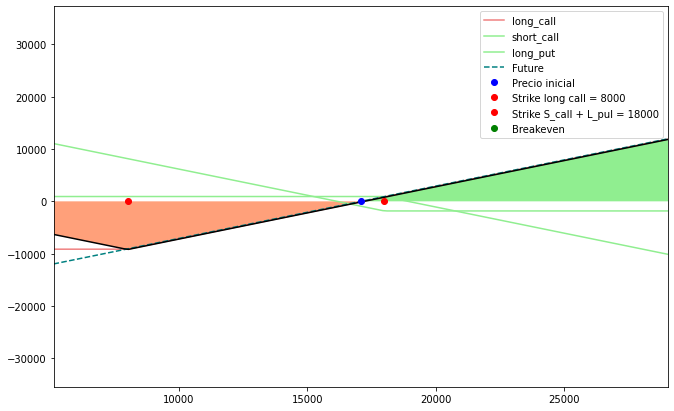

Delta P > K_call_short:  0.9578700000000004
Extrinsic P > K_call_short:  130.66036299999735
Max Loss:  1.1246999999999998


In [16]:
call_long_premium = call_long['mark_price'][0]*btc_price
call_long_delta = call_long['delta'][0]

call_short_premium = call_short['mark_price'][0]*btc_price
call_short_delta = call_short['delta'][0]

put_premium = put_long['mark_price'][0]*btc_price
delta_put = put_long['delta'][0]
tested_zebra_stgy(btc_price, 
           2, 1, 1,
           strike_ITM, strike_ATM, strike_ATM,
           call_long_premium,call_short_premium,put_premium,
           call_long_delta,call_short_delta,delta_put, 0.7)


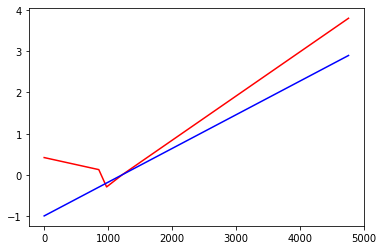

In [10]:
def zebra_tilde_slope(P, K_long_call, K_short_call, K_put,
           call_long_delta,call_short_delta,delta_put):
    value = 0
    if P<K_long_call:
        value = delta_put
    elif K_long_call < P < K_short_call:
        value = 2*call_long_delta + delta_put
    else:
        value = 2*call_long_delta - call_short_delta
    return value

K_long_call = 900
K_short_call = 1200
K_put = K_short_call

call_long_delta = op.black_scholes(K=K_long_call, St=P_entry, r=4, t=36, 
                     v=65, type='c')['greeks']['delta']
call_short_delta = op.black_scholes(K=K_short_call, St=P_entry, r=4, t=36, 
                     v=65, type='c')['greeks']['delta']
delta_put =op.black_scholes(K=K_put, St=P_entry, r=4, t=36, 
                     v=65, type='p')['greeks']['delta']

grid = np.arange(-1,3,0.1)
# price = grid*P_entry
# call_price = [op.black_scholes(K=1500, St=i*P_entry, r=4, t=35, 
#                      v=65, type='c')['greeks']['delta'] for i in grid]
# sell_call = [-call(i*P_entry, 1500, 
#                                   op.black_scholes(K=1500, St=i*P_entry, r=4, t=36, 
#                      v=65, type='c')['value']['option value']) for i in grid]
# plt.plot(price, call_price)
slopes_zebra = [zebra_tilde_slope(P_entry*(1+i),K_long_call, K_short_call, K_put,
           call_long_delta,call_short_delta,delta_put)*i for i in grid]
plt.plot(P_entry*(1+grid), slopes_zebra, c='r')
plt.plot(P_entry*(1+grid), grid, c='b')

plt.show()

In [11]:
def tested_zebra_slope(P_entry, 
               size_L, size_S, size_P,
               K_call_long, K_call_short, K_put, 
               long_premium, short_premium, put_premium,
               long_delta, short_delta, delta_put,
                     price_range):

    fig = plt.figure(figsize = (11,7))
    axs = fig.subplots(1)
    plugins.clear(fig)  # clear all plugins from the figure

    long_ext = long_premium - max(P_entry - K_call_long,0)
    short_ext = short_premium- max(P_entry - K_call_short,0)
    put_ext = put_premium- max(K_put- P_entry,0)

    leftmost = 0.0
    rightmost = 3
    step = 0.01
    grid = np.arange(-1,3,step)
    
    slopes_zebra = [zebra_tilde_slope(P_entry*i,K_call_long, K_call_short, K_put,
           long_delta,short_delta,delta_put)*i for i in grid]
    
    premium = size_L*long_premium-size_S*short_premium+size_P*put_premium


#     long_call_plot = axs.plot(grid*P_entry, long_delta*grid, c='lightcoral',label='long_call')
#     short_call_plot = axs.plot(grid*P_entry, short_delta*grid, c='lightgreen', label='short_call')
#     long_put_plot = axs.plot(grid*P_entry, delta_put*grid, c='lightgreen', label='long_put')
    future_plot = axs.plot(grid*P_entry, grid, c='teal', linestyle='dashed', label='Future')
    # axs.plot(grid*P_entry, bull_call_spread, c='blue')
    zebra_tilde_plot = axs.plot(grid*P_entry, slopes_zebra, c='black')
    
    # axs.plot(grid*P_entry, grid*P_entry, c='black')
    # axs.plot(grid*P_entry, -grid*P_entry, c='black')
#     axs.fill_between(grid*P_entry, 0, np.array(zebra_tilde), where=np.array(zebra_tilde) >= 0, facecolor='lightgreen', interpolate=True)
#     axs.fill_between(grid*P_entry, 0, np.array(zebra_tilde), where=np.array(zebra_tilde) <= 0, facecolor='lightsalmon', interpolate=True)

    axs.plot(P_entry, 0, 'bo', label='Precio inicial')
    axs.plot(K_call_long, 0, 'ro', label='Strike long call = '+str(K_call_long))
    axs.plot(K_call_short, 0, 'ro', label='Strike S_call + L_pul = '+str(K_call_short))
    axs.plot(2*K_call_long-K_call_short-premium,0, 'go', label='Breakeven')
#     axs.axhline(0, linestyle='dashed', c='black')#,linestyle='dashed')
#     axs.axvline(P_entry, linestyle = 'dashed', c='red')#,linestyle='dashed')
#     axs.set_ylim(-500,500)
    axs.set_xlim(P_entry*(1-price_range),P_entry*(1+price_range))
    axs.legend()
    plugins.connect(fig, plugins.Reset(), plugins.BoxZoom(), plugins.Zoom())#, tooltip)
#     plt.savefig('/home/agustin/Escritorio/Empresas/Cruize Finance/Images Results Zebra/results_strike_'+str(K_call_long)+'.png')
    plt.show()
    print('Delta P > K_call_short: ', size_L*long_delta-size_S*short_delta+size_P*delta_put)
    print('Extrinsic P > K_call_short: ', size_L*long_ext-size_S*short_ext+size_P*put_ext)
    print('Max Loss: ', premium/P_entry)
# print('Delta P > K_call_short: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])
# print('Extrinsic P > K_call_short: ', 2*bsm_long_call['value']['time value']-bsm_short_call['value']['time value'])
# print('Max Loss: ', (2*bsm_long_call['value']['option value']-bsm_short_call['value']['option value'])/P_entry)
# print('K_put < P: ', 2*bsm_long_call['greeks']['delta']-bsm_short_call['greeks']['delta'])

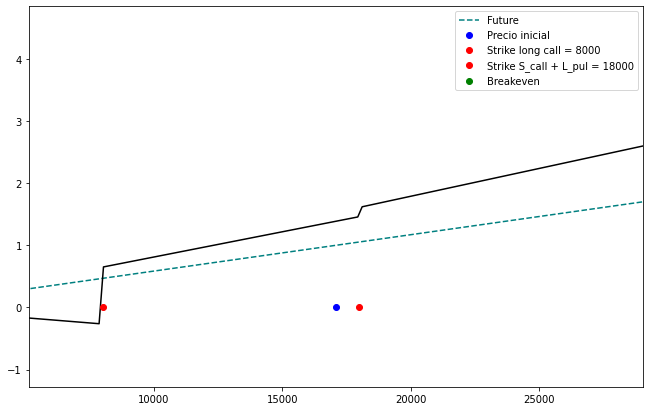

Delta P > K_call_short:  0.9578700000000004
Extrinsic P > K_call_short:  130.66036299999735
Max Loss:  1.1246999999999998


In [17]:
tested_zebra_slope(btc_price, 
           2, 1, 1,
           strike_ITM, strike_ATM, strike_ATM,
           call_long_premium,call_short_premium,put_premium,
           call_long_delta,call_short_delta,delta_put, 0.7)

In [102]:
P_entry

1193.5

In [95]:
short_delta

0.58

In [88]:
op.black_scholes(K=1500, St=i*P_entry, r=4, t=35, 
                     v=65, type='c')

{'value': {'option value': 1.2218929954887536e-35,
  'intrinsic value': 0,
  'time value': 1.2218929954887536e-35},
 'greeks': {'delta': 6.51733676835684e-36,
  'gamma': 3.400693396911608e-36,
  'theta': -2.8119912311114175e-35,
  'vega': 3.019262419184789e-35,
  'rho': 7.341611634848644e-37}}

In [13]:
def payoff_zebra_tilde_calc(price_change, P_entry,
           size_L, size_S,size_P,
           K_call_long, K_call_short, K_put_long,
           long_call_premium, short_call_premium, long_put_premium):
    new_price = P_entry + price_change
    
    long_call = call(new_price, K_call_long, long_call_premium)
    short_call = -call(new_price, K_call_short, short_call_premium)
    long_put = put(new_price, K_put_long, long_put_premium)
    
    premium = size_L*long_call_premium-size_S*short_call_premium+size_P*long_put_premium
    
    payoff = size_L*long_call+size_S*short_call+size_P*long_put
    pnl = payoff + P_entry - premium
    
    expected = price_change
    return {'payoff': payoff,'pnl': pnl, 'expected': expected, 'premium':premium}

In [18]:
price_changes = np.arange(P_entry+15000,-5000, -5000)
columns = []
table =  pd.DataFrame(index=price_changes,columns=['stgy payoff','Expected', 'Difference'])
for price_change in price_changes:
    results = payoff_zebra_tilde_calc(price_change, P_entry,
           2, 1,1,
           strike_ITM, strike_ATM, strike_ATM,
           call_long_premium,call_short_premium,put_premium)
    cruize_pnl = results['pnl']
    expected = results['expected']
#         table[t].iloc[j] = payoff
    table['stgy payoff'][price_change] = results['payoff']
#     table['total pnl'][price_change] = results['pnl']
    table['Expected'][price_change] = expected
    table['Difference'][price_change] = table['stgy payoff'][price_change]-table['Expected'][price_change]
    

In [149]:
payoff_zebra_tilde_calc(15000, 17000,
           2, 1,1,
           strike_ITM, strike_ATM, strike_ATM,
           call_long_premium,call_short_premium,put_premium)['payoff']

14784.559244000002

In [150]:
btc_price

17086.29

In [151]:
-(2*call_long_premium-call_short_premium+put_premium)

-11215.440755999998

In [152]:
btc_price-(2*call_long_premium-call_short_premium+put_premium)

5870.849244000003

In [153]:
(2*call_long_premium-call_short_premium+put_premium)/btc_price

0.6563999999999999

In [19]:
table

stgy payoff Expected Difference
 16221.1      225.25  16221.1   -15995.9
 11221.1    -4774.75  11221.1   -15995.9
 6221.1     -8659.15   6221.1   -14880.3
 1221.1     -3659.15   1221.1   -4880.25
-3778.9      1340.85  -3778.9    5119.75

In [63]:
2*call_long_delta-call_short_delta+put_delta

0.9921899999999999

In [102]:
call_short_premium

122.97334391999999

In [59]:
call_delta

0        0.95681
1        0.95681
2        0.95681
3        0.95681
4        0.95681
          ...   
16122    0.95517
16123    0.95515
16124    0.95514
16125    0.95514
16126    0.95513
Name: delta, Length: 16127, dtype: float64

In [168]:
import QuantLib as ql
yts = ql.YieldTermStructureHandle(ql.FlatForward(ql.Date(15,1,2020), 0.04, ql.Actual360()))

# Let the today date whenwe want to value a instrument be
fra = ql.ForwardRateAgreement(
    ql.Date(15,6,2020),
    ql.Date(15,12,2020),
    ql.Position.Long,
    0.01,
    1e6,
    ql.Euribor6M(yts),
    yts
)
strike = 100.0
maturity = ql.Date(27,1,2023)
option_type = ql.Option.Call

long_call = ql.PlainVanillaPayoff(ql.Option.Call, 900)
short_call = ql.PlainVanillaPayoff(ql.Option.Call, 1500)
long_put = ql.PlainVanillaPayoff(ql.Option.Put, 1500)

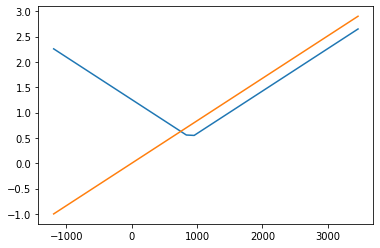

In [192]:
payoff_call = [(2*long_call(i*P_entry)-short_call(i*P_entry)+long_put(i*P_entry))/P_entry for i in grid]
plt.plot(grid*P_entry, payoff_call)
plt.plot(grid*P_entry, grid)

In [178]:
long_call(list(P_entry*grid))

TypeError: in method 'Payoff___call__', argument 2 of type 'Real'

In [ ]:
grid = np.arange(-1,3,step)
    
slopes_zebra = [zebra_tilde_slope(P_entry*i,K_call_long, K_call_short, K_put,
       long_delta,short_delta,delta_put)*i for i in grid]

premium = size_L*long_premium-size_S*short_premium+size_P*put_premium


#     long_call_plot = axs.plot(grid*P_entry, long_delta*grid, c='lightcoral',label='long_call')
#     short_call_plot = axs.plot(grid*P_entry, short_delta*grid, c='lightgreen', label='short_call')
#     long_put_plot = axs.plot(grid*P_entry, delta_put*grid, c='lightgreen', label='long_put')
future_plot = axs.plot(grid*P_entry, grid, c='teal', linestyle='dashed', label='Future')
# axs.plot(grid*P_entry, bull_call_spread, c='blue')
zebra_tilde_plot = axs.plot(grid*P_entry, slopes_zebra, c='black')

### Backtest costs

#### Weekly puts

In [343]:
strikes = list(np.arange(10000, 19000, 1000))
strike_ITM = 10000
# strike_ATM = 10000
strike_OTM = 15000 # 13000 14000, 14500
month = "2022-12"
date = '2022-12-16'
exp = '23DEC22'
directory_1 = '~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/'+month+'/'
directory_2 = '~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/'+month+'/'+date+'/'
call_long = pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ITM)+'-C.csv')[['mark_price','underlying_price','delta']]
# call_short = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ATM)+'-C.csv')[['mark_price','underlying_price','delta']]
put_long = pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_OTM)+'-P.csv')[['mark_price','underlying_price','delta']]
btc_price=call_long['underlying_price'][0]

In [317]:
date = '2022-12-16'
exp = '23DEC22'
directory_2 = '~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/'+month+'/'+date+'/'
strikes = [13000, 14000, 15000]
for strike in strikes:
    print(max(pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike)+'-P.csv')['mark_iv']))

108.15
89.83
73.55


In [344]:
v_max = max(pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_OTM)+'-P.csv')['mark_iv'])
v_mean= np.mean(pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_OTM)+'-P.csv')['mark_iv'])
v_min= min(pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_OTM)+'-P.csv')['mark_iv'])
v = (v_max +v_mean)/2
op.black_scholes(K=strike_OTM, St=btc_price, r=0, t=7, 
                     v=v, type='p')['value']['option value'], put_long['mark_price'][0] * btc_price

(43.173559550825075, 41.659535999999996)

In [102]:
dates = ['2022-12-16', '2022-12-17', '2022-12-18']
strikes = [13000, 14000, 14500]
pcgs = ['75 %','80 %','85 %']
for date in dates:
    print("Date "+str(date)+" and exp "+str(exp))
    print("btc price :", btc_price)
    for i in range(len(strikes)):
        put_long = pd.read_csv(directory_1+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strikes[i])+'-P.csv')[['mark_price','underlying_price','delta']]
        pcg = pcgs[i]
        yearly_cost = put_long['mark_price'][0] * 52
        print(pcg+" strike: "+str(strikes[i]))
        print("Mark price: " + str(put_long['mark_price'][0]) + " eth")
        print("Yearly cost: " + str(yearly_cost))

Date 2022-12-16 and exp 23DEC22
btc price : 16607.75
75 % strike: 13000
Mark price: 0.0005 eth
Yearly cost: 0.026000000000000002
80 % strike: 14000
Mark price: 0.0012 eth
Yearly cost: 0.0624
85 % strike: 14500
Mark price: 0.0017 eth
Yearly cost: 0.08839999999999999
Date 2022-12-17 and exp 23DEC22
btc price : 16607.75
75 % strike: 13000
Mark price: 0.0022 eth
Yearly cost: 0.1144
80 % strike: 14000
Mark price: 0.0036 eth
Yearly cost: 0.1872
85 % strike: 14500
Mark price: 0.0049 eth
Yearly cost: 0.25479999999999997
Date 2022-12-18 and exp 23DEC22
btc price : 16607.75
75 % strike: 13000
Mark price: 0.0011 eth
Yearly cost: 0.0572
80 % strike: 14000
Mark price: 0.0017 eth
Yearly cost: 0.08839999999999999
85 % strike: 14500
Mark price: 0.0027 eth
Yearly cost: 0.1404


In [95]:
'-'+str(strikes[i])+'-P.csv'

'-13000-P.csv'

In [62]:
directory_2+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ITM)+'-C.csv'#[['mark_price','underlying_price','delta']]

'~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/2022-09/2022-09-14/deribit_options_chain_2022-09-14_BTC-23SEP22-13000-C.csv'

In [84]:
btc_price

17358.14

In [109]:
# put_premium = put_long['mark_price'][0]*btc_price
pcg = "85%"
yearly_cost = put_long['mark_price'][0] * 52
print("Date "+str(date)+" and exp "+str(exp))
print("btc price :", btc_price)
print(pcg+" strike: "+str(strike_OTM))
print("Mark price: " + str(put_long['mark_price'][0]) + " eth")
print("Yearly cost: ", yearly_cost)

Date 2022-12-16 and exp 23DEC22
btc price : 17358.14
85% strike: 14500
Mark price: 0.0017 eth
Yearly cost:  0.08839999999999999


In [123]:
volatilities = [100, 115, 130]
strikes = [13000, 14000, 14500]
pcgs = ['75 %','80 %','85 %']
for i in range(strikes):
    for vol in volatilities:    
        premium = op.black_scholes(K=13000, St=btc_price, r=0, t=7, 
                             v=vol, type='p')['value']['option value']
        # put_premium = put_long['mark_price'][0]*btc_price
        yearly_cost = premium * 52 / btc_price
        print("Date "+str(date)+" and exp "+str(exp))
        print("btc price :", btc_price)
        print(pcgs[i]+" strike: "+str(strikes[i]))
        print("Mark price: " + str(put_long['mark_price'][0]) + " eth")
        print("Yearly cost: ", yearly_cost)

Date 2022-12-16 and exp 23DEC22
btc price : 17358.14
75 % strike: 14500
Mark price: 0.0017 eth
Yearly cost:  0.08891098165099391


In [ ]:
strikes = list(np.arange(10000, 19000, 1000))
strike_ITM = 8000
strike_ATM = 18000
date = '2022-12-10'
exp = '27JAN23'
directory = '~/Git-Repos/HedgingScripts/scripts/datasets_options_chain/'+date+'/exp '+exp+'/'
call_long = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ITM)+'-C.csv')[['mark_price','underlying_price','delta']]
call_short = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ATM)+'-C.csv')[['mark_price','underlying_price','delta']]
put_long = pd.read_csv(directory+'deribit_options_chain_'+date+'_BTC-'+exp+'-'+str(strike_ATM)+'-P.csv')[['mark_price','underlying_price','delta']]
btc_price=call_long['underlying_price'][0]

btc_price

call_long_premium = call_long['mark_price'][0]*btc_price
call_long_delta = call_long['delta'][0]

call_short_premium = call_short['mark_price'][0]*btc_price
call_short_delta = call_short['delta'][0]

put_premium = put_long['mark_price'][0]*btc_price
delta_put = put_long['delta'][0]
tested_zebra_stgy(btc_price, 
           2, 1, 1,
           strike_ITM, strike_ATM, strike_ATM,
           call_long_premium,call_short_premium,put_premium,
           call_long_delta,call_short_delta,delta_put, 0.7)


In [219]:
strike = 13000
maturity = ql.Date(15,6,2022)
option_type = ql.Option.Put

payoff = ql.PlainVanillaPayoff(option_type, strike)

europeanExercise = ql.EuropeanExercise(maturity)
europeanOption = ql.VanillaOption(payoff, europeanExercise)

In [220]:
europeanOption.NPV()

0.0

In [227]:
today = ql.Date().todaysDate()
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.05, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual365Fixed()))
volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), 0.1, ql.Actual365Fixed()))
initialValue = ql.QuoteHandle(ql.SimpleQuote(100))
process = ql.BlackScholesMertonProcess(initialValue, dividendTS, riskFreeTS, volatility)
option = ql.EuropeanOption(payoff,exercise)
engine = ql.AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)

IndentationError: unexpected indent (<ipython-input-227-8b84cb858bb9>, line 7)

In [350]:
# Based on http://www.smileofthales.com/computation/quantlib-python-option-pricing/ + doc
underlying = ql.SimpleQuote(17000)
today = ql.Date(9, 12, 2022)
maturity = ql.Date(16,12,2022)
option_type = ql.Option.Call

payoff = ql.PlainVanillaPayoff(option_type, 13000)
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), 0.1, ql.Actual365Fixed()))
initialValue = ql.QuoteHandle(underlying)
process = ql.BlackScholesMertonProcess(initialValue, dividendTS, riskFreeTS, volatility)

# process = ql.GeneralizedBlackScholesProcess(ql.QuoteHandle(underlying),
#                                         ql.YieldTermStructureHandle(dividendYield),
#                                         ql.YieldTermStructureHandle(riskFreeRate),
#                                         ql.BlackVolTermStructureHandle(volatilitySurface))

expint = maturity
exercise = ql.EuropeanExercise(expint)
option = ql.EuropeanOption(payoff,exercise)

engine = ql.AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)

In [352]:
optObj = DeribitOptionsData('ETH')
exp = optObj.expiries()

calls = optObj.get_side_exp('Call', exp[-2])
calls = calls[calls.dollar_mid >0]
calls['Bs_price'] = BS_CALL(calls.underlying_price, calls.strike, calls.time, calls.interest_rate, 0.8303)
vols_a = []
for row in calls.itertuples():
    sigma = optObj.option_info(row.instrument_name)['result']['ask_iv'] / 100
    V = BS_CALL(row.underlying_price, row.strike , row.time, 0, float(sigma))
    vols_a.append(sigma)
    print('#'*50)
    print(f'Calculated BS {V}')
    print(f'From api call {row.dollar_ask}')
    print('STRIKE = ', row.strike)

calls['implied_vol_ask'] = vols_a

NameError: name 'DeribitOptionsData' is not defined